Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

Load the data from CSV

In [2]:
data=pd.read_csv("spam.csv", sep=',',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Preprocessing

In [3]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data=data.rename(columns={"v1":"label","v2":"text"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['y']=data['label'].map({'ham': 0, 'spam': 1})
data.head()

,label,text,y
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
data.describe()

,y
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
data.isnull().sum()

label    0
text     0
y        0
dtype: int64

In [8]:
data.duplicated().sum()

403

In [9]:
data.count()

label    5572
text     5572
y        5572
dtype: int64

Data Visualization

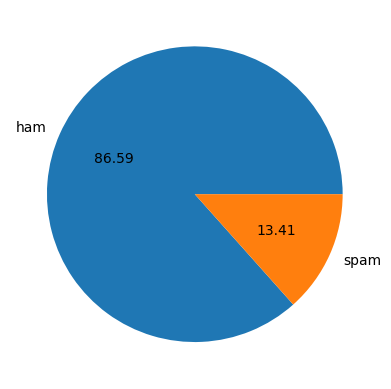

In [10]:
plt.pie(data['label'].value_counts(), labels= ['ham','spam'], autopct = "%0.2f")
plt.show()

Data Splitting and Model Training

In [11]:
y=data['y']
x=data['text']

Split the dataset into training and testing sets


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
print((x_train.shape),(x_test.shape),(y_train.shape),(y_test.shape))

(4457,) (1115,) (4457,) (1115,)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()

In [15]:
training_data=count_vector.fit_transform(x_train).toarray()
testing_data=count_vector.transform(x_test).toarray()

In [16]:
model=LogisticRegression()
model.fit(training_data,y_train)

LogisticRegression()

Make predictions on the test set

In [17]:
y_pred=model.predict(testing_data)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(accuracy_score(y_test,y_pred)*100)

97.66816143497758


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      0.82      0.90       135

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



In [21]:
print(confusion_matrix(y_test,y_pred))

[[978   2]
 [ 24 111]]


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase =True)

In [24]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [25]:
model1 = LogisticRegression()
model1.fit(x_train_features, y_train)

LogisticRegression()

New input emails for classification

In [26]:
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
input_mail1 = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_mail_features = feature_extraction.transform(input_mail1)
prediction_new =model1.predict(input_mail_features)

In [27]:
if prediction_new[0]==1:
    print('spam mail')

else:
    print('ham mail')

spam mail


In [28]:
print(prediction_new[0])

1
